# Introduction

This is case study from the **Google Data Analytics Certificate** about **How did a bike-share business achieve success?**

Cyclistic is the company bike-share from Chicago which has more than 5,800 bikes and 600 docking stations. Cyclistic offers **reclining bikes, hand tricycles and cargo bikes**, making bike-share more inclusive for disabilities user and customer who cannot use standard two-wheeled bicycles. The majority of customer choose classic bikes. About 8% of drivers use the assistance option. Biker are more likely to cycle for leisure, but around 30% use it to commute to work every day.

Currently Cyclistic's marketing strategy has relied on building general awareness and appealing to broad consumer segments. One approach that helps make this happen is price flexibility: 
- one-way tickets, 
- full-day tickets, and 
- annual memberships 

Customers who purchase a one-way ticket or a full day ticket are referred to as casual. Customers who purchase annual memberships are Cyclistic members. Cyclistic's financial analysts have concluded that annual members are much more profitable than casual riders. While the price flexibility is helping Cyclistic attract more customers, **Moreno** believes that maximizing the number of annual members will be the key to future growth.

In this project, I am as a **data analyst** have task to collecting, analyzing, and reporting data that helps guide Cyclistic's marketing strategy.

The mystakeholder is come from :
- **executive team** (this team will decide whether they approve the recommended marketing)
- **Lily Moreno** (Marketing Directors)

In this case I have a big qutestion **"How is the trend of casual and members user using Cyclistic bicycles differently?"** From this question we have the goal to **created a new marketing strategy for convert casual biker to join in membership**.

So that for this case, I use **6 (six) Steps of Process Analysis** to get inshigt about data from last 12 month (August 2022 - July 2023) to created strategy and decision making for out stakeholder.

# Ask
**Identify the business task**

From this case Moreno (my stakholder) have some question about : 
- How do members and basic riders use their bikes differently?
- Why do regular riders buy an Cyclistic membership?
- How does Cyclistic use digital media to influence regular riders to become members?

To answer of the question I have business task to identify about **How members and casual biker use bicycles with differently?**


# Prepare
**1. Data source** 

I was provided with historical bicycle trips data by Cyclistic to analyze and identify trends. Download Bike trip data for the previous 12 months from August 2022 until July 2023. (source : [in here](https://divvy-tripdata.s3.amazonaws.com/index.html>))

**2. Identify Tools**

All data trips is in comma-delimited (.CSV) format with 15 columns, with size more than 130 MB and there are 12 files, so that :
- for tools like excel and google sheet is not good choice because that is have capacity limitations.
- databases on bigquery or postgreSQL have large storage, so I can import the data to database, combine and then analysis, but for visualization you must use separate tools like looker stuido (google studio), power BI or tableau.
- R studio or Jupyter Notebook can be best choice, because it can import data, analysis and make visualization, and for this project I use R programming.


# Process
**1. Install Packages**

I must Install required packages : 
- tidyverse for data import and wrangling
- data.table to extract data from zip file
- lubridate for date functions
- ggplot for visualization
- modeest for analysis

In [1]:
library(tidyverse)  # helps wrangle data
library(lubridate)  # helps wrangle date attributes
library(ggplot2)  # helps visualize data
library(data.table) # extract data from zip file
library(modeest)  # for get Modus from the data

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




**2. Import Data**

To collect the data with import from the source and include to data frame

In [2]:
# import data from https://divvy-tripdata.s3.amazonaws.com
bike_share_trips_202208 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202208-divvy-tripdata.zip | funzip")
bike_share_trips_202209 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202209-divvy-tripdata.zip | funzip")
bike_share_trips_202210 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202210-divvy-tripdata.zip | funzip")
bike_share_trips_202211 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202211-divvy-tripdata.zip | funzip")
bike_share_trips_202212 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202212-divvy-tripdata.zip | funzip")
bike_share_trips_202301 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202301-divvy-tripdata.zip | funzip")
bike_share_trips_202302 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202302-divvy-tripdata.zip | funzip")
bike_share_trips_202303 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202303-divvy-tripdata.zip | funzip")
bike_share_trips_202304 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202304-divvy-tripdata.zip | funzip")
bike_share_trips_202305 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202305-divvy-tripdata.zip | funzip")
bike_share_trips_202306 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202306-divvy-tripdata.zip | funzip")
bike_share_trips_202307 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202307-divvy-tripdata.zip | funzip")

Check each data frame to see the **number of rows, list column and data type**.

In [3]:
# check the data
glimpse(bike_share_trips_202208)

Rows: 785,932
Columns: 13
$ ride_id            <chr> "550CF7EFEAE0C618", "DAD198F405F9C5F5", "E6F2BC47B6~
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", ~
$ started_at         <dttm> 2022-08-07 21:34:15, 2022-08-08 14:39:21, 2022-08-~
$ ended_at           <dttm> 2022-08-07 21:41:46, 2022-08-08 14:53:23, 2022-08-~
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ start_lat          <dbl> 41.93, 41.89, 41.97, 41.94, 41.85, 41.79, 41.89, 41~
$ start_lng          <dbl> -87.69, -87.64, -87.69, -87.65, -87.65, -87.72, -87~
$ end_lat            <dbl> 41.94, 41.92, 41.97, 41.97, 41.84, 41.82, 41.89, 41~
$ end_lng            <dbl> -87.72, -87.64, -87.66, -87.69, -87.66, -87.69, -87~
$ member_casua

From this databse we know about a file have :
- 785,932 Rows
- 13 column with : 

    - 2 column with data type datetime : started_at, ended_at
    - 7 column with data type charater : ride_id, rideable_type, start_station_name, start_station_id, end_station_name, end_station_id, member_casual
    - 4 column with data type double  : start_lat, start_lng, end_lat, end_lng

**3. Combined all data**

All data frame combine into one large data frame (in this case we call **all_trips**) which have all data trips from last 12 month (August 2022 - July 2023)

In [4]:
all_trips <- bind_rows(bike_share_trips_202208
                        , bike_share_trips_202209
                        , bike_share_trips_202210
                        , bike_share_trips_202211
                        , bike_share_trips_202212
                        , bike_share_trips_202301
                        , bike_share_trips_202302
                        , bike_share_trips_202303
                        , bike_share_trips_202304
                        , bike_share_trips_202305
                        , bike_share_trips_202306
                        , bike_share_trips_202307
                        )

**4. Clean up, Modified and Add Data**

From the data **all_trips** have some field not use for analysis like start_lat, start_lng, end_lat and end_lng. So in this step thats field will be remove from the data. Combine all data can make remove field process easier because you don't have remove each data frame in different code

In [5]:
# Remove start_lat, start_lng, end_lat and end_lng fields 
all_trips <- all_trips %>% 
            select(-c(start_lat, start_lng, end_lat, end_lng))

The data can only be aggregated at the ride-level, which is too granular. I want to add some additional columns of data such as day, month, year that provide additional opportunities to aggregate the data.

In [6]:
# Add columns that list the hour, date, month, day, and year of each ride
# https://www.statmethods.net/input/dates.html
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$number_day_of_week <- wday(all_trips$date)

I want to add a calculated field for length of ride since the Aug 2022 - July 2023 data did not have the **"duration"** column. I want add to **"ride_length"** to the entire dataframe for consistency.


In [7]:
# Add a "ride_length" calculation to all_trips (in minutes)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- as.numeric(difftime(all_trips$ended_at,all_trips$started_at))/60

There are some biker have duration with negative value and I want to clean it.

In [37]:
negative_trip_duration <- count(all_trips[(all_trips$ride_length<0)])
message('total trips with negative value duration is ', negative_trip_duration, ' from ', prettyNum(count(all_trips), big.mark=","), ' row')

total trips with negative value duration is 121 from 5,723,606 row



There are 121 row anomali data so we want to clean it but I created in diffrernt data frame so it doesn't change the original source (in this case we name **all_trips_v2**)

In [9]:
# Remove "bad" data with ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed
# https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]


In [10]:
# final result 
glimpse(all_trips_v2)

Rows: 5,723,485
Columns: 16
$ ride_id            <chr> "550CF7EFEAE0C618", "DAD198F405F9C5F5", "E6F2BC47B6~
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", ~
$ started_at         <dttm> 2022-08-07 21:34:15, 2022-08-08 14:39:21, 2022-08-~
$ ended_at           <dttm> 2022-08-07 21:41:46, 2022-08-08 14:53:23, 2022-08-~
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",~
$ member_casual      <chr> "casual", "casual", "casual", "casual", "casual", "~
$ date               <date> 2022-08-07, 2022-08-08, 2022-08-08, 2022-08-08, 20~
$ month              <chr> "08", "08", "08", "08", "08", "08", "08", "08", "08~
$ day                <chr> "07", "08", "08", "08", "07", "08", "08", "07", "07~
$ year      

finnaly the data is ready for Analysis, where I have data with **5,723,485 row** and **17 column** with namely :

- rider_id (type of text) is id to identify of reocrd of trips 
- rideable_type (type of text) is type of bike use in the trips like 
    - electric_bike
    - classic_bike
    - docked_bike
- started_at (type of datetime) is start date and time biker in first station
- ended_at (type of datetime) is end date and time biker in end station
- start_station_name (type of text) is name station biker start the trip
- start_station_id (type of text) is id from station when biker start the trip
- end_station_name (type of text) is name station station biker end the trip
- end_station_id (type of text) is id from station when biker end the trip
- member_casual (type of text) is type of biker like : 
    - member biker (purchase a one-way ticket or a full day ticket)
    - casual biker (purchase annual memberships)
- date (type of text) is date from biker start of the trip
- month (type of text) is number of month from biker start of the trip
- day (type of text) is number of day from biker start of the trip
- day_of_week (type of  text) is day from biker start of the trip
- year (type of text) is number of year from biker start of the trip
- number_day_of_week (type of integer) is number day of week from biker start of the trip
    - 01 = Sunday
    - 02 = Monday
    - 03 = Tuesday
    - 04 = Wednesday
    - 05 = Thusday
    - 06 = Friday
    - 07 = Saturday
- ride_length (type of duration) is duration between start_at and ended_at in minute

# Analysis

Let's first look at a statistical summary of aggregated and transformed data frame. Please focus on looking at each column!

In [12]:
# Statistical summary of data. Mainly for numerics
summary(all_trips_v2)

   ride_id          rideable_type        started_at                    
 Length:5723485     Length:5723485     Min.   :2022-08-01 00:00:00.00  
 Class :character   Class :character   1st Qu.:2022-09-28 13:56:25.00  
 Mode  :character   Mode  :character   Median :2023-02-16 13:56:54.00  
                                       Mean   :2023-02-01 23:55:28.23  
                                       3rd Qu.:2023-06-03 07:41:29.00  
                                       Max.   :2023-07-31 23:59:56.00  
    ended_at                     start_station_name start_station_id  
 Min.   :2022-08-01 00:05:00.0   Length:5723485     Length:5723485    
 1st Qu.:2022-09-28 14:11:52.0   Class :character   Class :character  
 Median :2023-02-16 14:09:54.0   Mode  :character   Mode  :character  
 Mean   :2023-02-02 00:13:49.7                                        
 3rd Qu.:2023-06-03 08:00:00.0                                        
 Max.   :2023-08-12 04:53:41.0                                        

In [13]:
# Check to make sure the proper number of observations were reassigned
total_trips = count(all_trips_v2)

all_trips_v2 %>% 
    group_by(member_casual) %>%
    summarise(total = n(), percentange = (n()/total_trips)*100.00)		                                             

  member_casual total   percentange
1 casual        2169497 37.90517   
2 member        3553988 62.09483   

From field member_casual we I to know how many number of trip from each other type of biker.

In the last 12 months (August 2022 - July 2023) I have finding that member biker contributing to 62.09% of all trips, so I want to increase this percentage from casual biker after I know trend from the data.

In [14]:
# Check proportion bike type from each bike user
total_trips = count(all_trips_v2)

all_trips_v2 %>% 
    group_by(member_casual, rideable_type) %>%
    summarise(total = n(), percentange = (n()/total_trips)*100.00) %>%
    arrange(member_casual, desc(percentange))	

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


  member_casual rideable_type total   percentange
1 casual        electric_bike 1249450 21.830231  
2 casual        classic_bike   791143 13.822750  
3 casual        docked_bike    128904  2.252194  
4 member        electric_bike 1860878 32.513023  
5 member        classic_bike  1693110 29.581802  

**electric_bike** are the most popular bike type with have the biggest percentage from members and casual biker.


Let's next focus on the field ride_length of each biker to see duration of the trips and then break down by field member_casual to compare casual and members biker.

In [15]:
# Descriptive analysis on ride_length (all figures in seconds)
summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.45     9.60    18.36    17.10 51461.40 

I see the average duration, each biker is close to 20 minutes.

And then I want to breakdown from field member_casual fro looking at casual and members user bike to compare measure with mean and median from field ride_length.

In [17]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,28.14356
member,12.38699


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,11.850000
member,8.516667


I can see that the average duration of casual biker is  **30 minutes** and the member biker is **12 minutes**. The median is **12 minutes**  and **8 minutes** respectively.

And now lets compare modus day of week between members and casual user bike.

In [18]:
aggregate(all_trips_v2$number_day_of_week ~ all_trips_v2$member_casual, FUN = mfv)

all_trips_v2$member_casual,all_trips_v2$number_day_of_week
<chr>,<int>
casual,7
member,5


Using the statistical mode, I see that the most common day for renting bikes is : 
- 7 = Saturday for casual
- 5 = Thusday for member


Looking at the average duartion by each day for members vs casual bikers

In [19]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,27.38547
member,Friday,12.35365
casual,Monday,27.26827
member,Monday,11.83411
casual,Saturday,32.58655
member,Saturday,13.87064
casual,Sunday,33.03585
member,Sunday,13.68664
casual,Thursday,23.84530


Notice that the days of the week are out of order. Let's fix that.

In [20]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


Now, let's run the average duration by each day for members vs casual bikers

In [21]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,33.03585
member,Sunday,13.68664
casual,Monday,27.26827
member,Monday,11.83411
casual,Tuesday,25.14536
member,Tuesday,11.90928
casual,Wednesday,24.07410
member,Wednesday,11.77595
casual,Thursday,23.84530


The results of average duration in minute from Sunday to Saturday have the same trend between casuals and members. The average longer trips occur on **Saturday** and **Sunday**. 

- Peak of the trend average duration for member biker occurs in 13.68 and 13.87 minute
- And the peak of average duration for casual biker trend occurs in 32.58 and 33.03 minute

Maybe it would be clearer if it were depicted in a bar graph

In [22]:
# analyze monthly average duration by Rider type and weekday
all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(year_month, member_casual, day_of_week) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  pivot_wider(names_from = day_of_week , values_from = average_duration) %>%
  arrange(year_month, member_casual) 

`summarise()` has grouped output by 'year_month', 'member_casual'. You can
override using the `.groups` argument.


year_month,member_casual,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-08,casual,33.74788,28.89360,28.17886,25.641818,25.173343,30.22622,31.94477
2022-08,member,14.63529,12.47723,13.06032,12.994335,13.040553,13.55639,14.68513
2022-09,casual,34.65795,28.62833,21.16902,22.791766,21.176732,27.12732,35.38760
2022-09,member,14.14203,12.54849,12.22992,12.390190,12.428637,12.98900,14.79267
2022-10,casual,32.38731,22.22942,23.33585,20.124006,19.637134,25.34083,30.24986
2022-10,member,13.32626,11.41757,11.18002,11.263694,10.952349,11.69950,13.48673
2022-11,casual,34.11129,17.71876,16.69818,16.400891,24.171348,19.26460,22.56021
2022-11,member,11.87630,10.56754,10.77927,10.922043,11.675448,11.34775,11.17465
2022-12,casual,25.11038,18.28568,15.32382,24.224319,19.692970,29.05865,23.29322


For details, I can pivot the average duration for the last 12 months in daily from **Sunday** to **Saturday**.

In [23]:
# analyze monthly number_of_rides by ride type and weekday
all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(year_month, member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  pivot_wider(names_from = day_of_week , values_from = number_of_rides) %>%
  arrange(year_month, member_casual) 

`summarise()` has grouped output by 'year_month', 'member_casual'. You can
override using the `.groups` argument.


year_month,member_casual,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2022-08,casual,48154,42361,51508,51488,42351,56867,66188
2022-08,member,42972,62602,76718,76616,57508,58703,51881
2022-09,casual,36254,31051,29586,33504,45838,56385,64076
2022-09,member,35739,47422,57033,61505,76589,72329,54019
2022-10,casual,44681,27234,15694,20593,22585,25979,52222
2022-10,member,50366,58287,39748,48893,49238,45024,58137
2022-11,casual,12472,10300,15808,17779,17981,14538,11869
2022-11,member,21193,32304,46114,47448,39125,30323,20440
2022-12,casual,5343,4936,5917,5678,8177,7156,7687


I can also do the same thing for total trips for the last 12 months in daily from Sunday to Saturday.

But, seeing many numbers like this, will make our analysis less effective. I must to go through each line one by one carefully and it takes a very long time.

Therefore it will be easier if the numbers are explained in visualization.

# Share

**Determine the best way to share findings.**

Certain simple findings work well as small tables as shown above. 

Other findings I will present visualizations using ggplot2

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


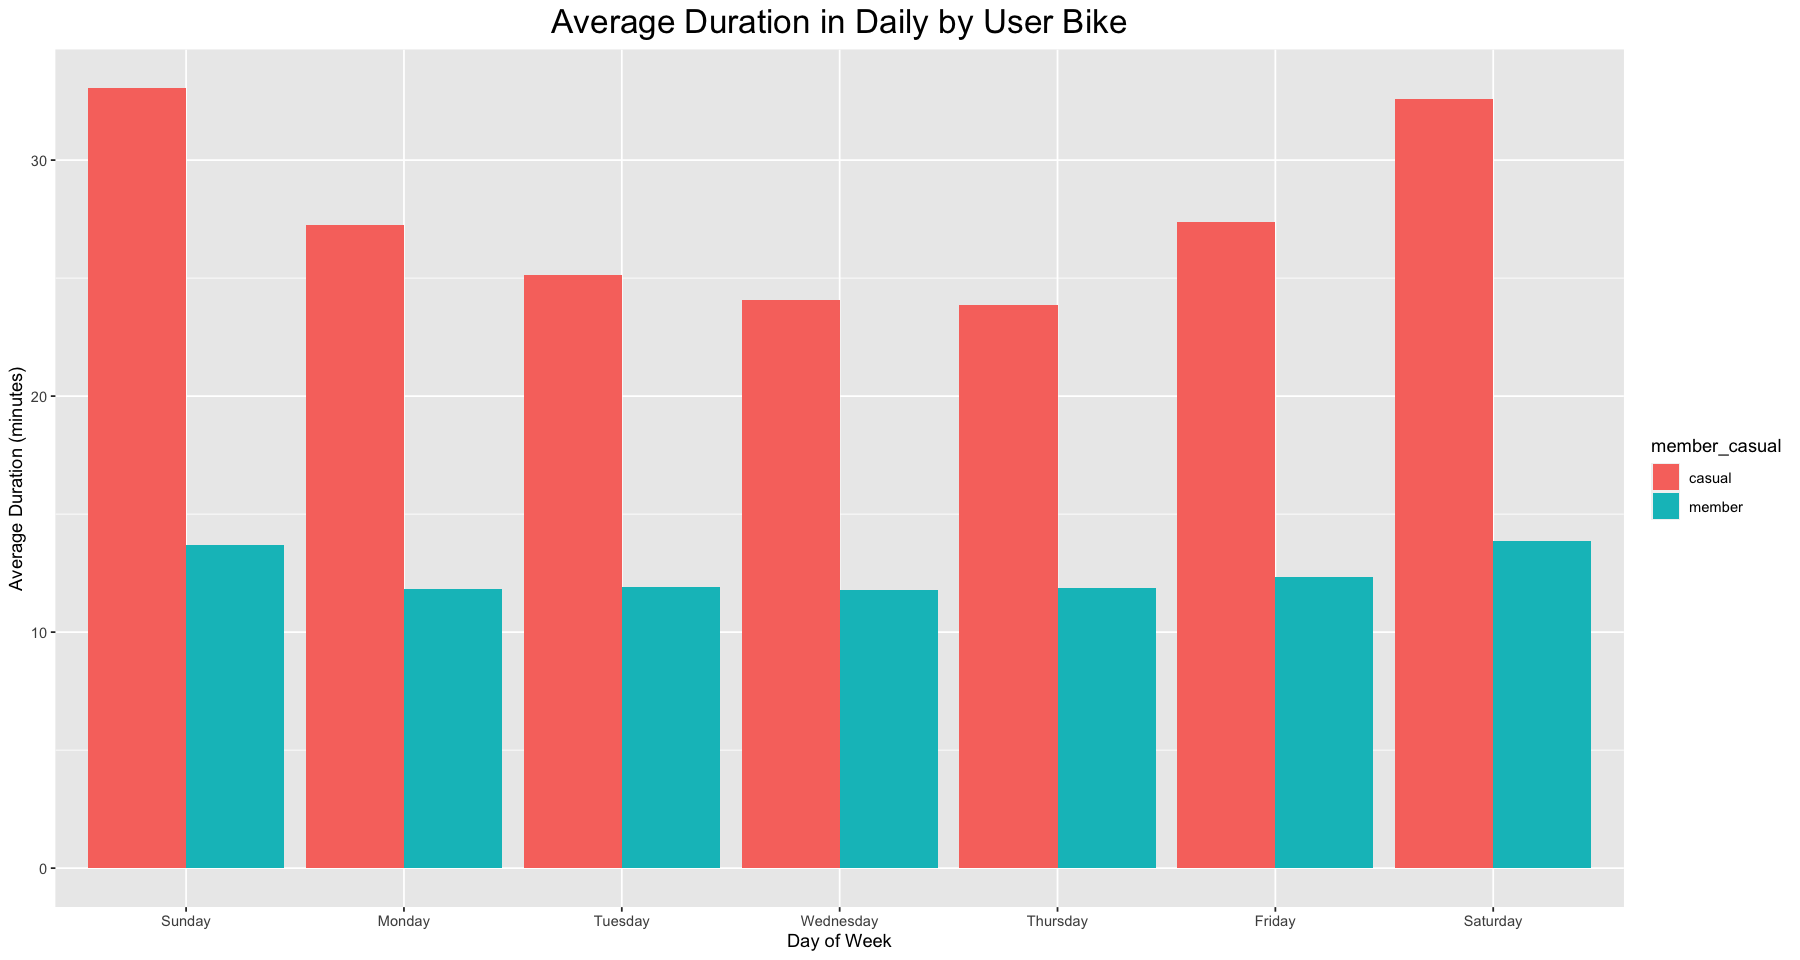

In [38]:
# analyze average duration in daily basis

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, day_of_week) %>%                   
  summarise(average_duration = mean(ride_length)) %>% 		                                        
  arrange(member_casual, day_of_week)	%>%
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Average Duration in Daily by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week")

Using bar chart, the daily average duration trend can be clearly. 
The trend from casual or members biker is shaped like the letter "U" with its peak point on Saturday and Sunday.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


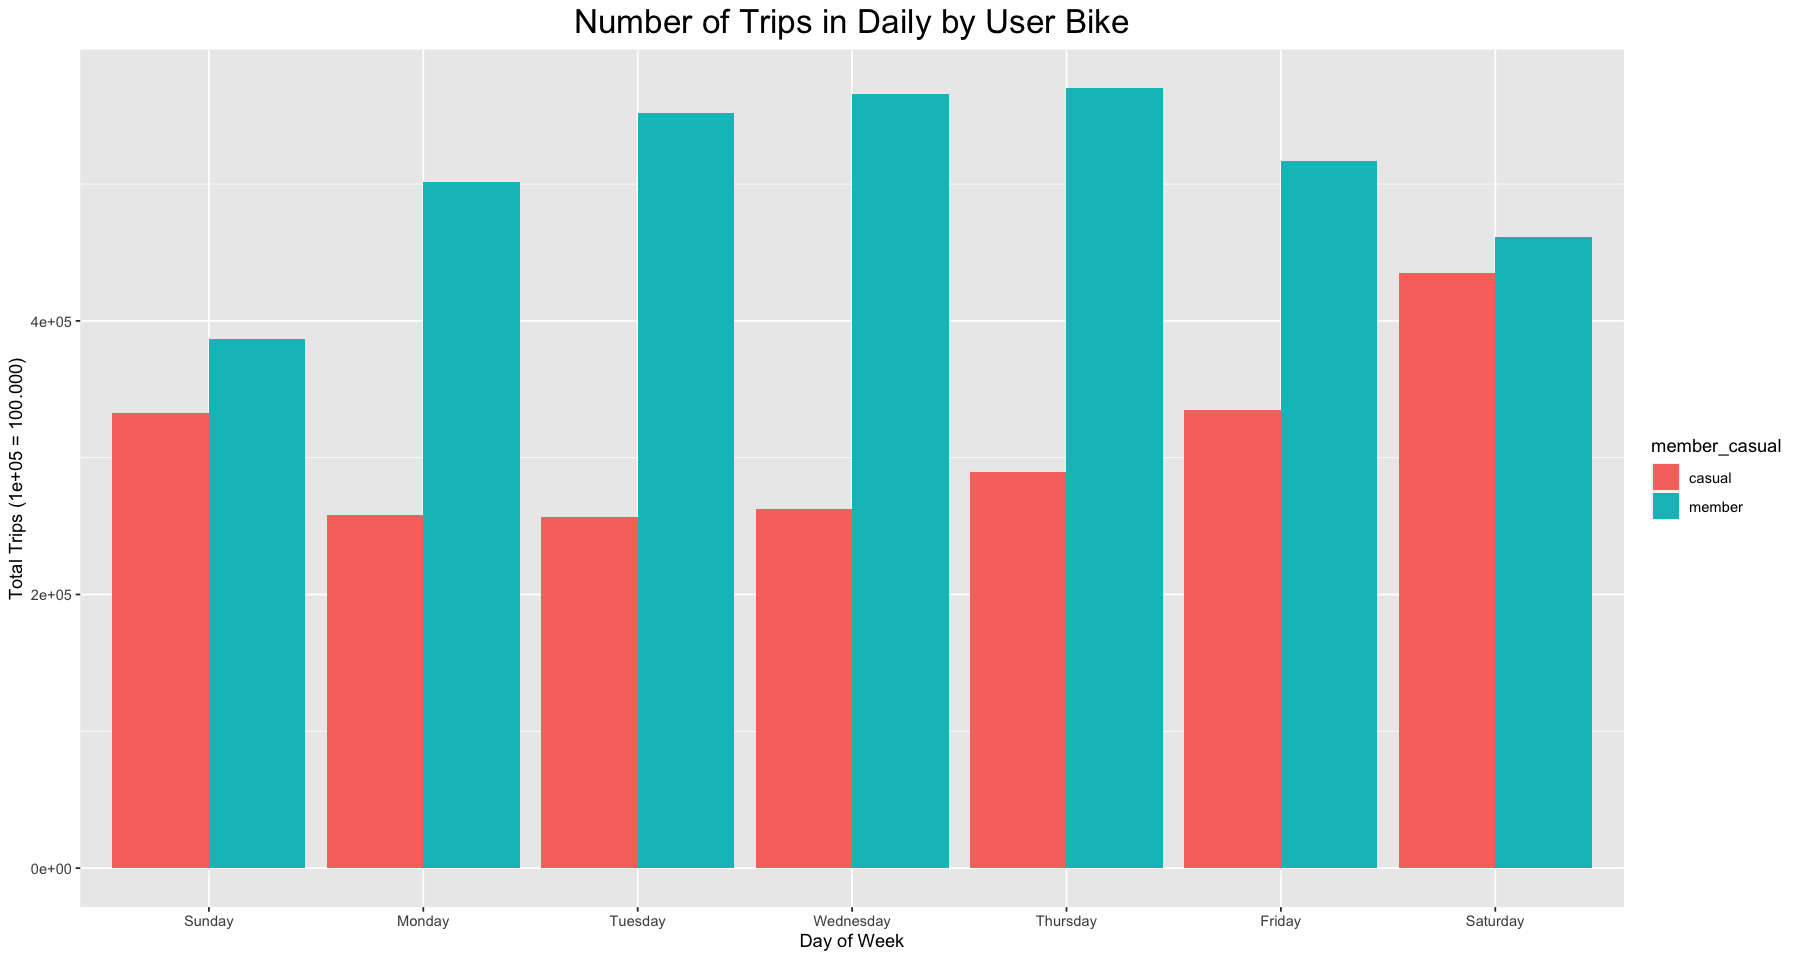

In [26]:
# analyze number of trip in daily basis

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_trips = n()) %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = number_of_trips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips in Daily by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Day of Week")


Next step is to look at the pattern for trend number of trips in daily
- The peak for member biker occurs on Tuesday, Wednesday and Thursday.
- Meanwhile, the peak for casual biker occurs on Saturday and Sunday.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


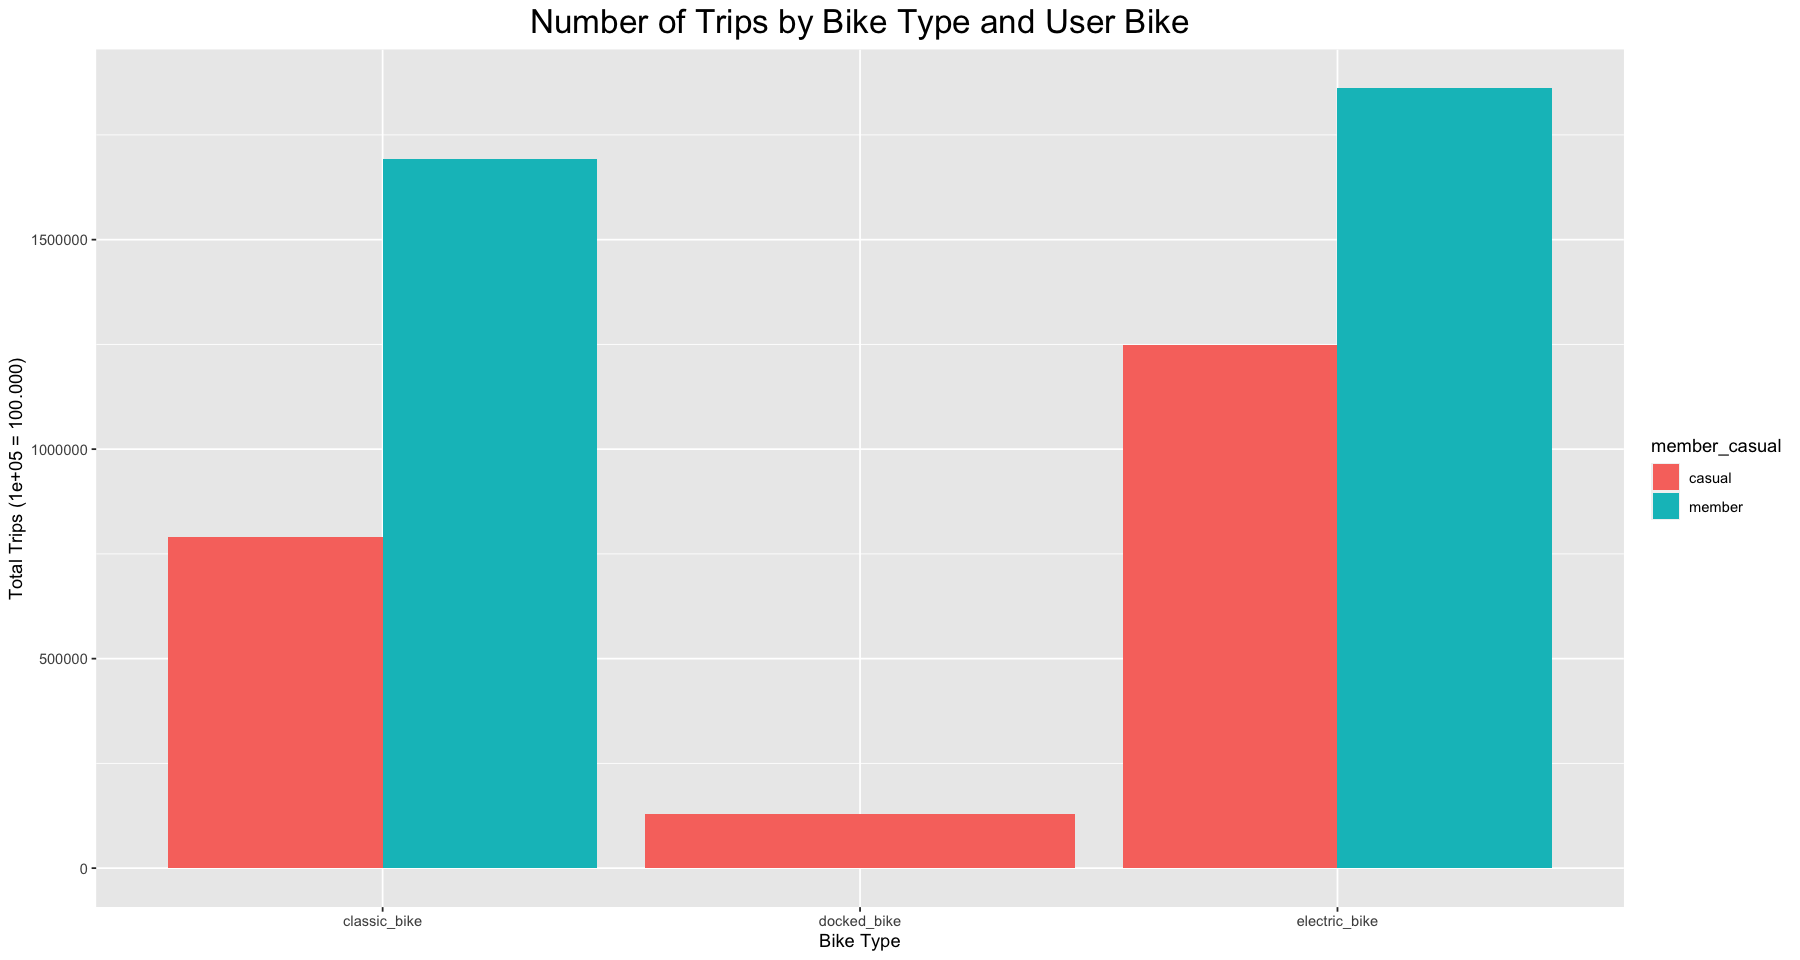

In [27]:
# analyze proportion of bike type

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_trips = n()) %>% 
  arrange(member_casual, rideable_type) %>% 
  ggplot(aes(x = rideable_type, y = number_of_trips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips by Bike Type and User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Bike Type")


The bike with used by member and casual biker are electric bikes and classic bikes, especially **electric bikes** which are very popular. Meanwhile, **docked bikes** only used by casual biker more inclusive with disabilities user and customer who cannot use standard two-wheeled bicycles.

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


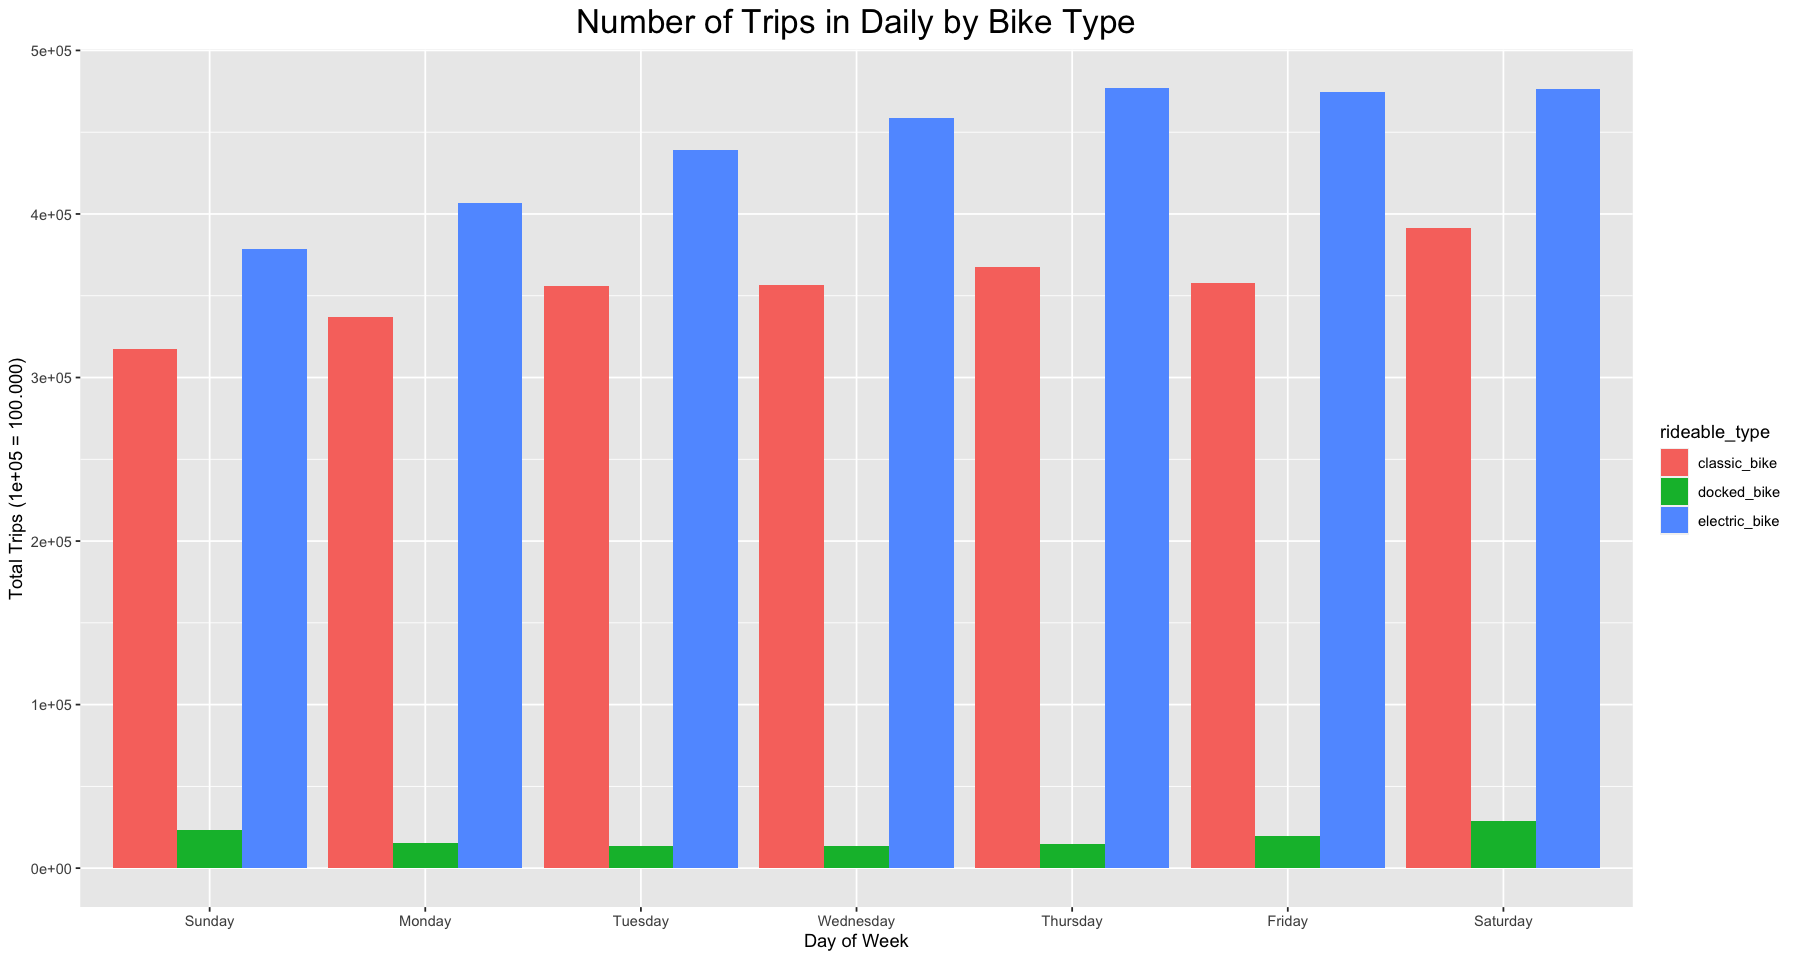

In [28]:
# analyze number of trip in daily by bike type

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(number_of_trips = n()) %>% 
  arrange(day_of_week, rideable_type) %>% 
  ggplot(aes(x = day_of_week, y = number_of_trips, fill = rideable_type)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips in Daily by Bike Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Day of Week")


The number of trips per day is dominated by electric bikes,
with trend increase from Sunday until Saturday, with a difference not too far classic bikes are still in great demand.
Meanwhile, docked bikes have the lowest number of trips for every day.

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


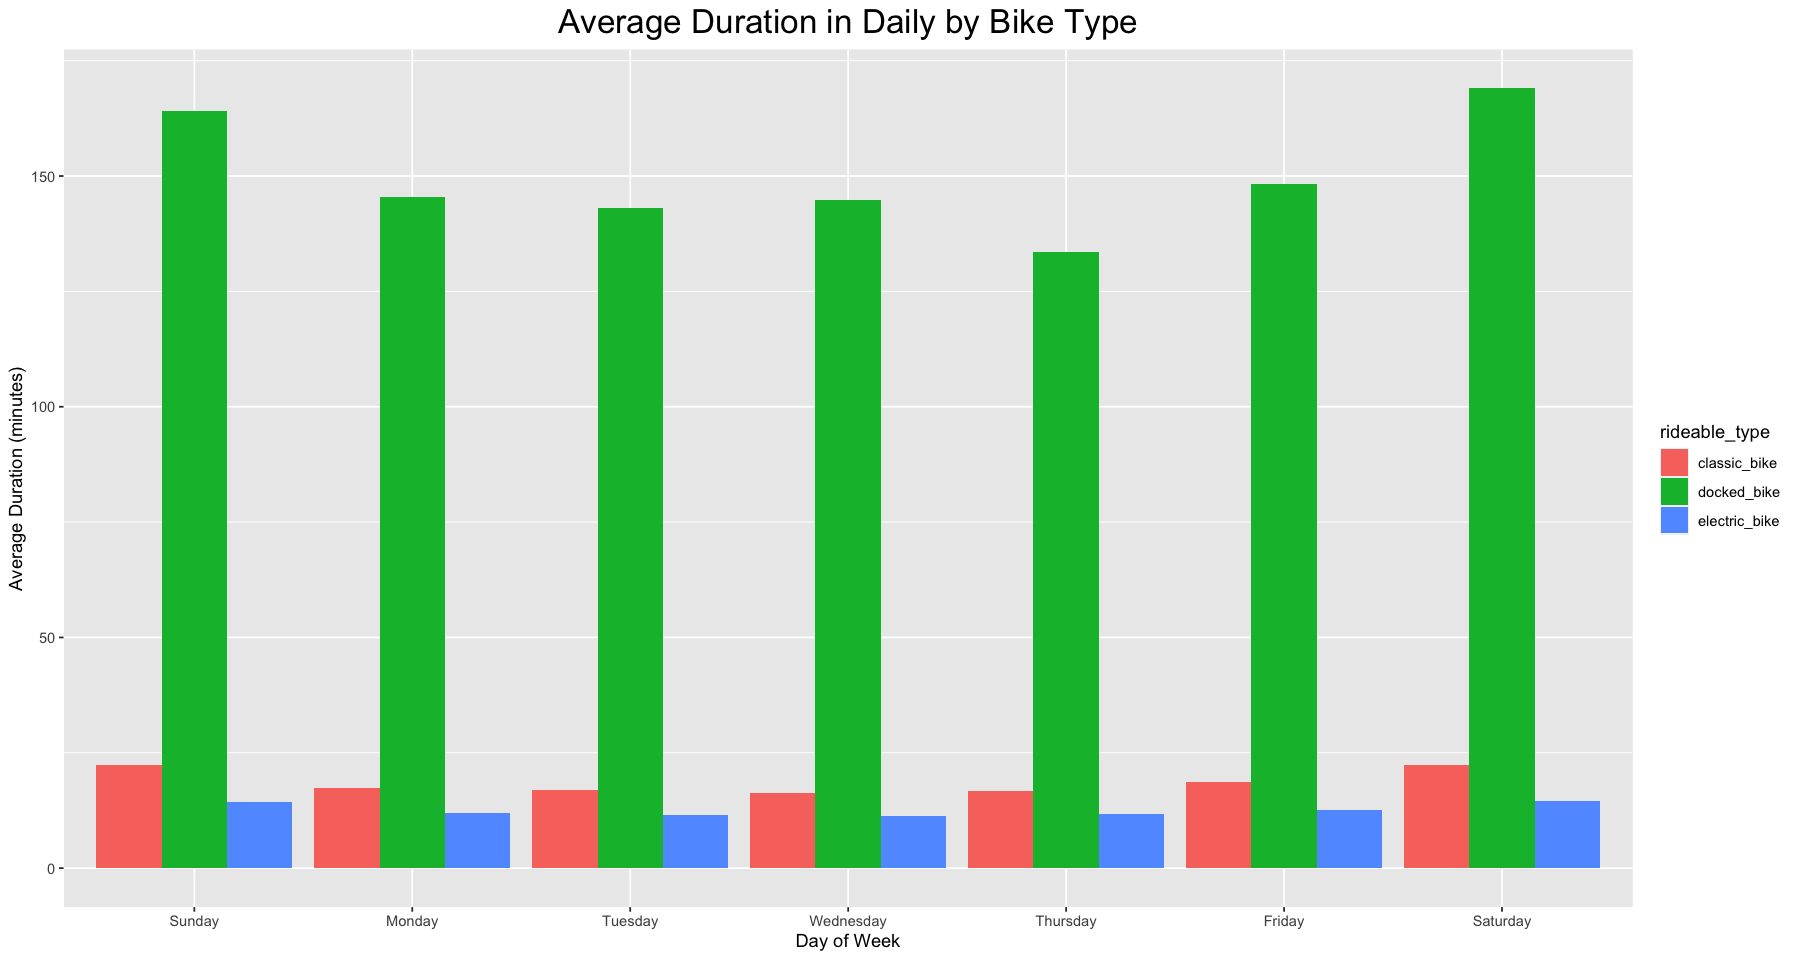

In [29]:
# Analyze Average duration in daily by bike type

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(average_duration = mean(ride_length)) %>% 		                                        
  arrange(day_of_week, rideable_type) %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = rideable_type)) +
  geom_col(position = "dodge") +
  labs(title="Average Duration in Daily by Bike Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week")


In [30]:
# Min and Max average duration in daily by bike type

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(average_duration = mean(ride_length)) %>% 		                                        
  group_by(rideable_type) %>%
  summarise(min_avg = min(average_duration), max_avg = max(average_duration)) %>%
  arrange(min_avg)

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


rideable_type,min_avg,max_avg
<chr>,<dbl>,<dbl>
electric_bike,11.38551,14.54054
classic_bike,16.38910,22.44024
docked_bike,133.50610,168.98199


The average duration per day for docked bikes have very long usage, with range 133 - 169 minutes or 2 - 3 hours, cause are intended of disabilities user so that the average duration for daily is longer when compared to non-disabilities user.

Meanwhile, for electric bikes, the average duration per day is very short, in range of 11 - 14 minutes, case electric bikes are equipped with electric drive motors which are capable of producing faster speeds.

All right, after analyzing data with daily period, let's look at the monthly period, where we will use a line chart to see trend more clearly.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


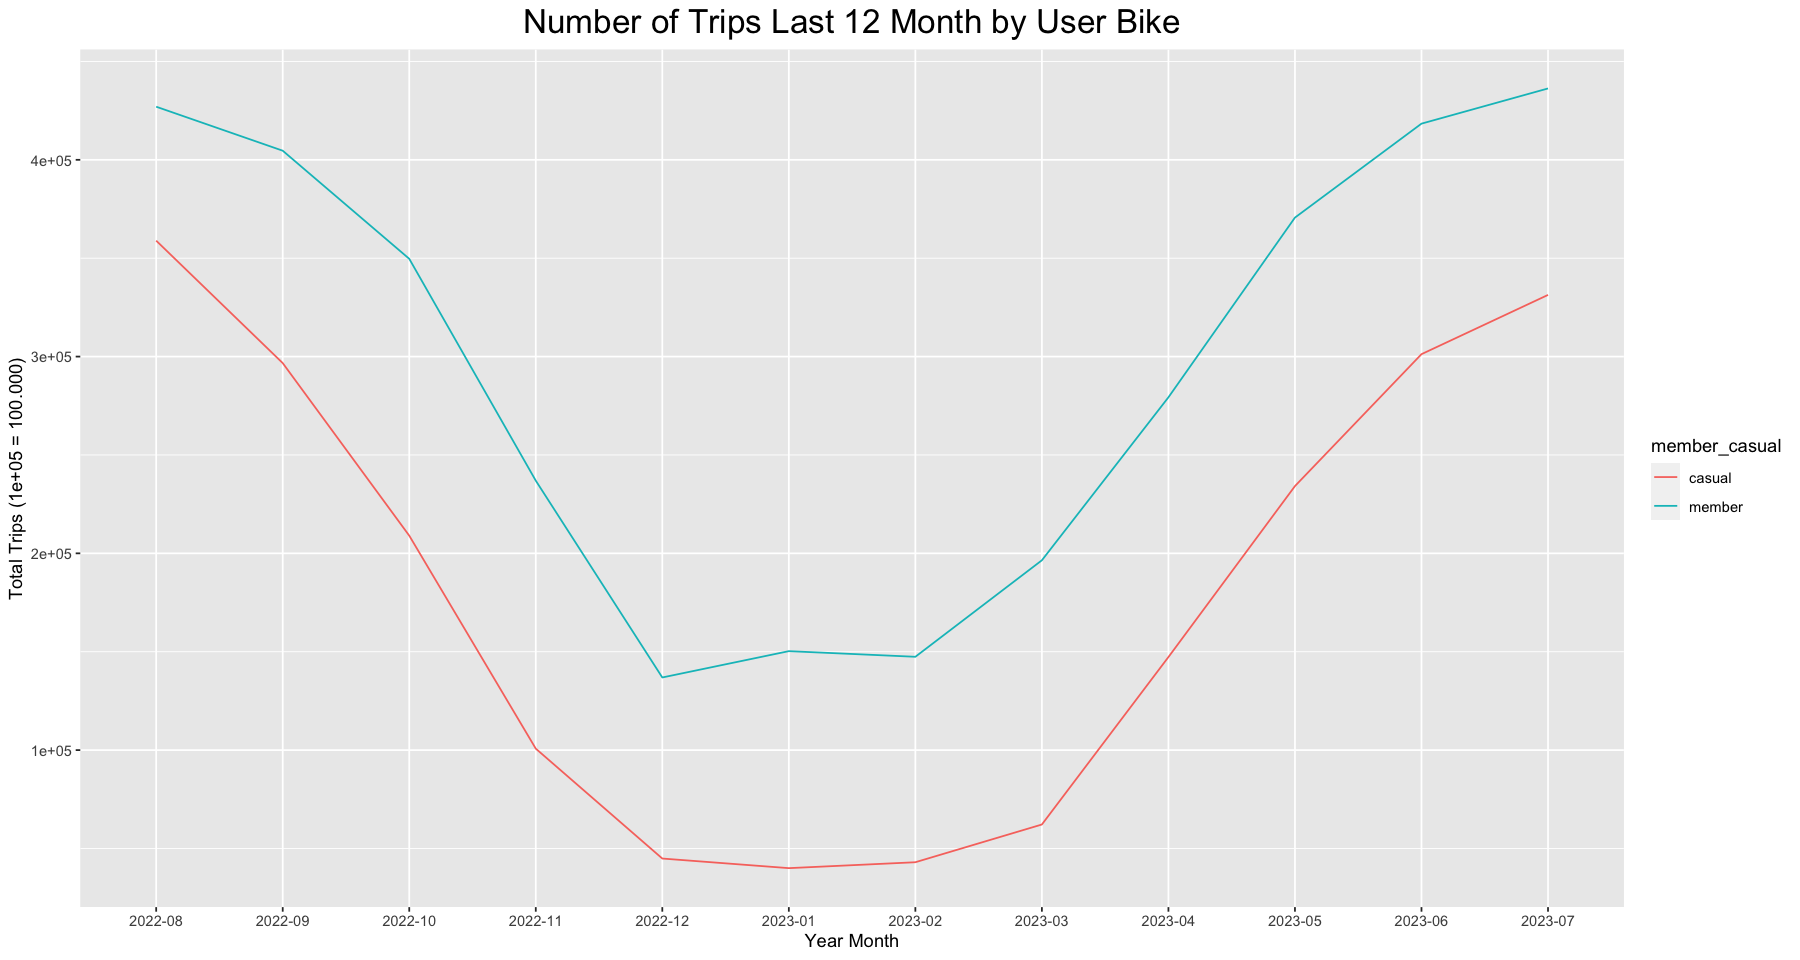

In [31]:
# Let's visualize the number of rides by rider last 12 month

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, year_month)  %>% 
  ggplot() +
  geom_line(aes(x = year_month, y = number_of_rides, group=member_casual, color=member_casual)) +
  labs(title="Number of Trips Last 12 Month by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Year Month")

During last 12 months (August 2022 - July 2023) the trend generated by member and casual biker was almost the same trend for number of trips, there was a very significant decrease in **December 2022 until February 2023**. 

Maybe it will be easier to see of the peak of the trend if sort by month.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


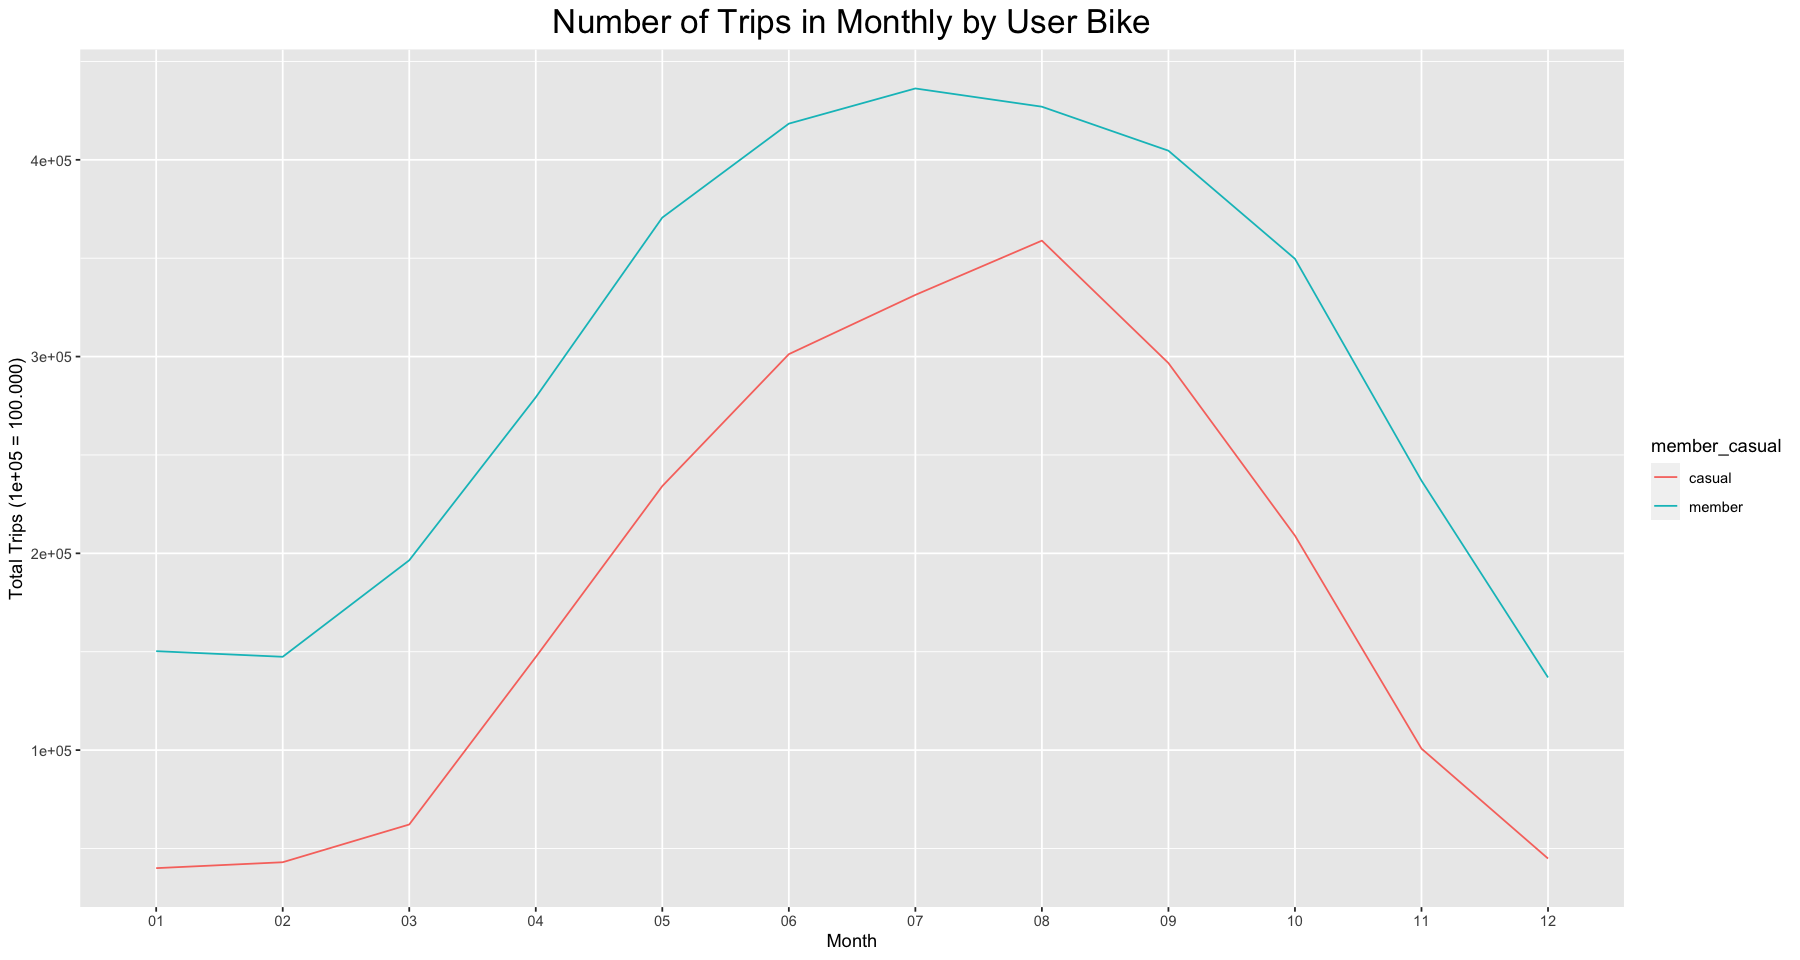

In [32]:
# The number of rides by rider type in monthly

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = number_of_rides, group=member_casual, color=member_casual)) +
  labs(title="Number of Trips in Monthly by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Month")

By sorting the month, it can be seen that the peak trend in number of trips by members and casual biker is almost the same, that is in **June (06) - September (09)**.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


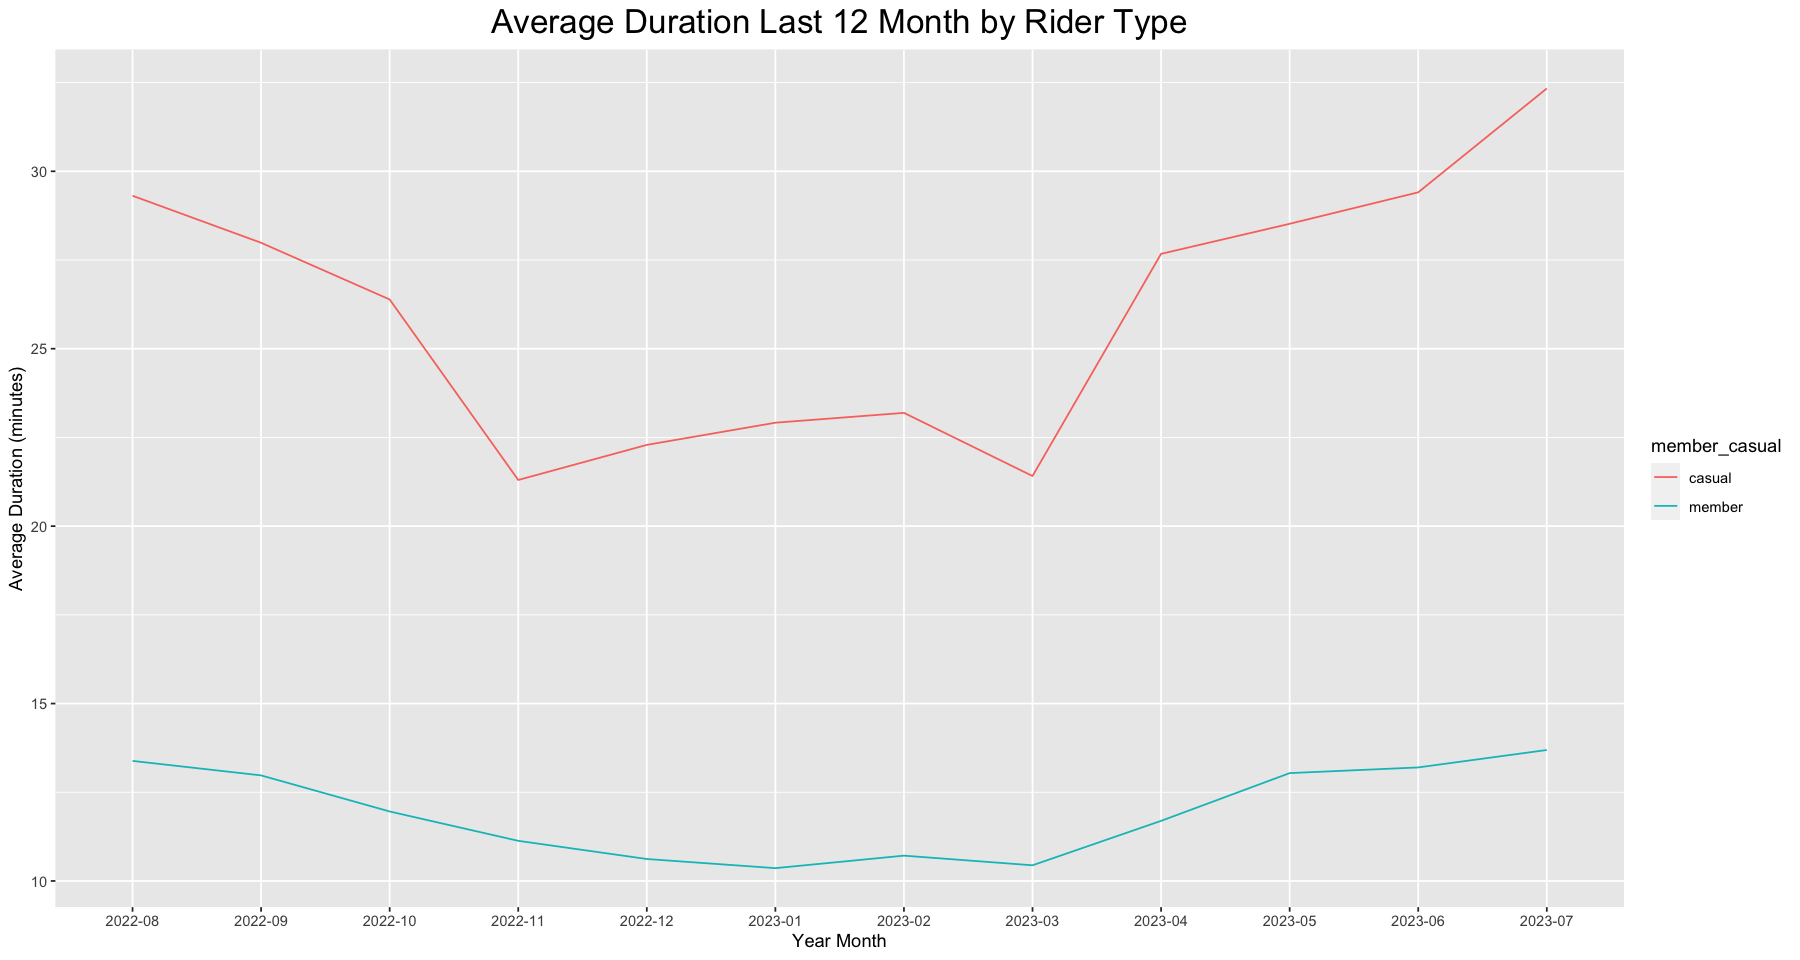

In [39]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(member_casual, year_month) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(member_casual, year_month)  %>% 
  ggplot() +
  geom_line(aes(x = year_month, y = average_duration, group=member_casual, color=member_casual)) +
  labs(title="Average Duration Last 12 Month by Rider Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Average Duration (minutes)") + 
  xlab("Year Month")
  

The number of trips will also have an impact on the average duration trend per month, which can be seen during the last 12 months (August 2022 - July 2027), the number of trips is not to much then average duration will be short, especially for member and casual type bicycle users in **December 2022 - March 2023**.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


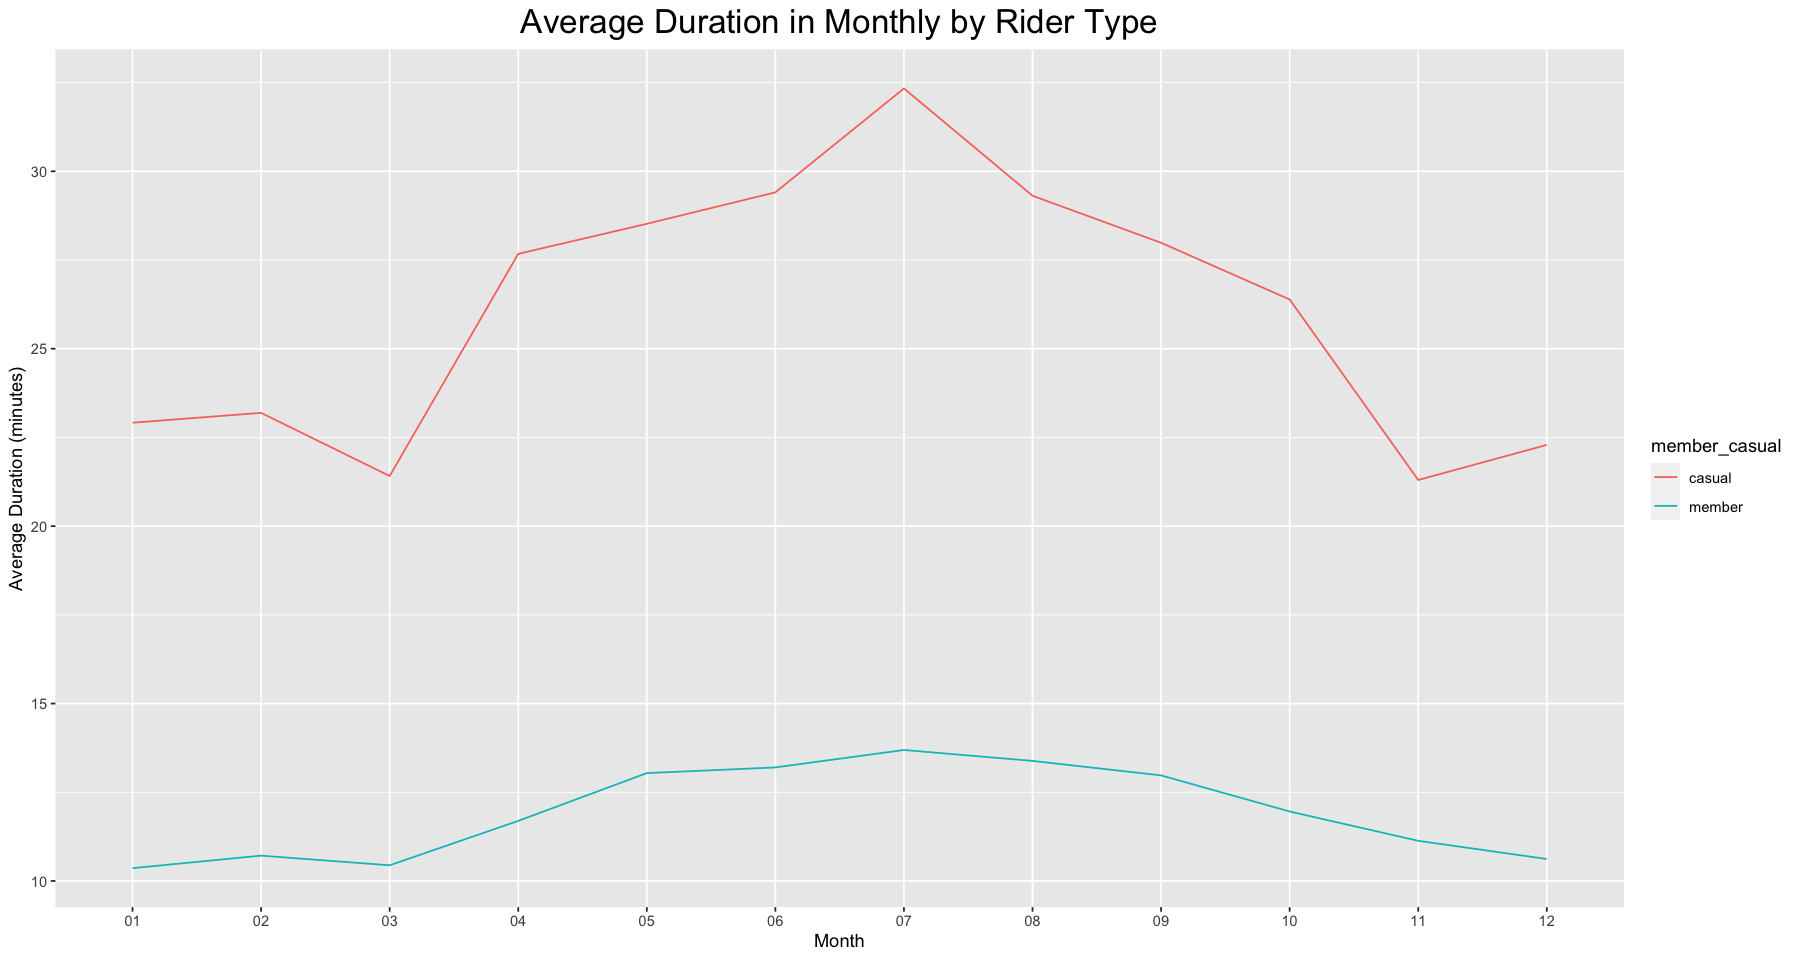

In [40]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = average_duration, group=member_casual, color=member_casual)) +
  labs(title="Average Duration in Monthly by Rider Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Average Duration (minutes)") + 
  xlab("Month")
  

Meanwhile, if sort it by month, the trend will look similar with the peak of the trend for the longer average duration occurring in **July (07)**.

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


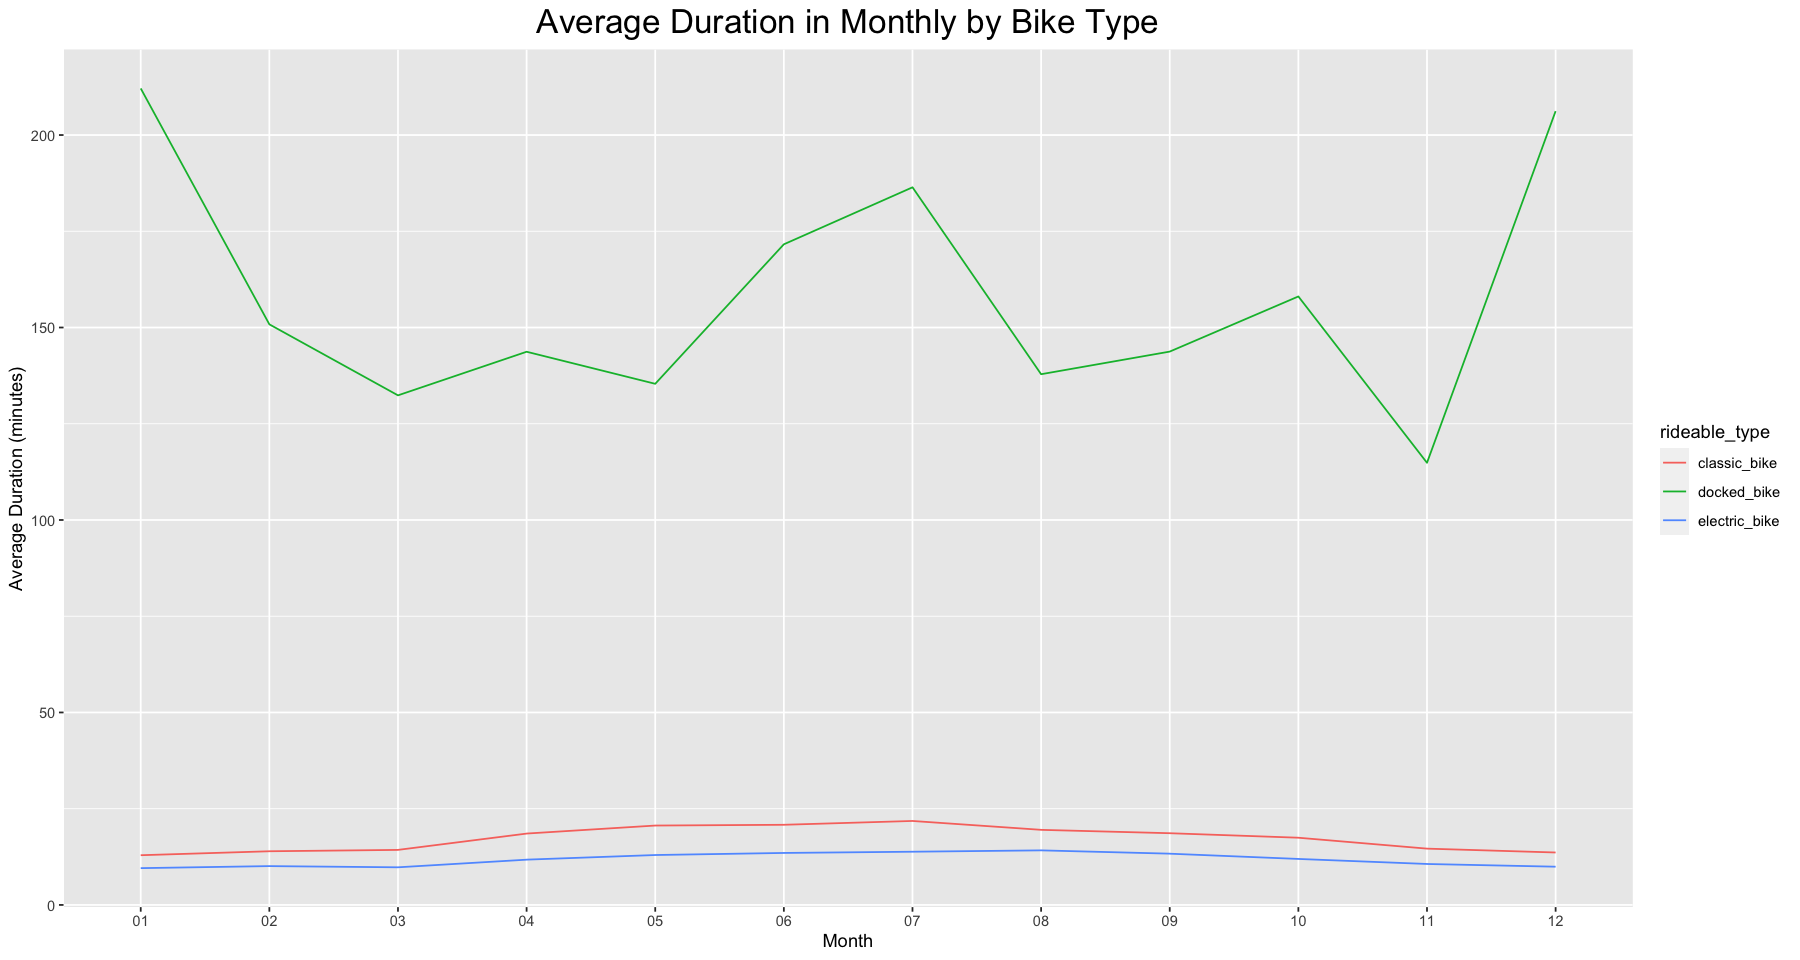

In [42]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 15, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = average_duration, group=rideable_type, color=rideable_type)) +
  labs(title="Average Duration in Monthly by Bike Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Average Duration (minutes)") + 
  xlab("Month")
  

In [31]:
all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  group_by(rideable_type) %>%
  summarise(min_avg = min(average_duration), max_avg = max(average_duration)) %>%
  arrange(min_avg)



`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


rideable_type,min_avg,max_avg
<chr>,<dbl>,<dbl>
electric_bike,9.558053,14.18140
classic_bike,12.915384,21.81924
docked_bike,114.857826,212.10330


In monthly trend average duration for docked bike has a very large gap from electric bikes and classic bikes, if can see the average duration for a docked bike is in the range of **115 - 212 minutes** or **2 - 3 hours**. Meanwhile for electric bike have average duration in range **9 - 14 minutes** and for classic bicycles it is only **13 - 22 minutes**.

In [34]:
# Create a csv file that we will visualize in Excel, Tableau, or my presentation software

data <- all_trips_v2 %>% 
        unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
        group_by(year_month, year, month, member_casual, rideable_type, number_day_of_week, day_of_week) %>% 
        summarise(number_of_rides = n(), total_duration = sum(ride_length)) %>% 
        arrange(year_month, member_casual) 
write.csv(data, file = 'summary_of_cyclistic_bike_share_trips.csv')

`summarise()` has grouped output by 'year_month', 'year', 'month',
'member_casual', 'rideable_type', 'number_day_of_week'. You can override using
the `.groups` argument.


And then for the result with interactive visualizaion, I created a dashbourd using tableu with summary data from analysis of cylistic bike share.

You can see it, in this link : https://public.tableau.com/app/profile/trio.wibowo/viz/CylisticBikeShareTrips/cylisticbikesharetrips

**Identify trends and present the findings**

Here is summary result analysis from above :

- The largest contribution number of trips in cylistic is member biker in percentage to 62.09% from overall.
- Electric bikes become most popular and favored by member and casual biker.
- While docked bikes have the lowest number of trips because it's intended for disabilities users and all of them come from casual biker.
- The average duration for member biker is shorter than that of casual biker, especially for electric bike cause electric bike have electric drive motors which can make it easier for users.
- The average duration for member and casual biker is longest on Saturdays and Sundays, especially for docked bike which are intended for users disabilities with an average of around 2 - 3 hours.
- For casual biker most of them trips on Sunday and Saturday and with longer average duration to relax and enjoy the view.
- Meanwhile, member biker mostly trips on weekdays like Tuesday, Wednesday and Thursday to carry out daily activities such as work, shopping, hobbies and so on.
- If look at the trend in monthly, the number of trips users is greatly influenced by season and weather conditions.

    |Weather|Date|
    |-----------|-----------|
    |Spring| March, 01 - May, 31|
    |Summer| June, 01 - August, 31|
    |Fall| September, 01 - November, 30|
    |Winter| December, 01 - February, 28|

    source from : https://hikersbay.com/climate/usa/chicago?lang=id

- The peak of the trend from number of trips being in June - September which coincides with Summer or the transition from Summer to Fall.   
- Where in Summer many people do outdoor activities from another season.


# Act

**Three is some recommendations based on result of analysis**


1. Increase the number of electric bike that are currently most popular bike and then we can improve service for electric bicycles because they are prone to damage such as  system charging, spare batteries, and other spare parts.
2. Arrange bicycle routes with station points that cross office areas, schools, shopping centers, parks and places that have good views so that can make new users attract to use bicycles.
3. Create a membership type for holidays (Saturday and Sunday) with a different offer price from annual member and casual.
4. Create a special membership for disabilities users, even though the number of trips is not many per month, if look at the average duration which is in the range of 2-3 hours, it will provide an opportunity to increase member users by offering attractive prices compared to casual users.
5. Create big event/campain in Summer like bicycle racing competition or big-discount for member biker.






